In [3]:
import os
import sys 
os.chdir("/workspaces/dev")
sys.path.append("/workspaces/dev/modules")

In [4]:
from matplotlib import pyplot as plt
from pathlib import Path
import cv2

In [5]:
from Pills.Utils import *
from Pills import *

2025-03-08 08:57:08.350260: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-08 08:57:08.517888: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741424228.578942     709 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741424228.596557     709 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-08 08:57:08.748572: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [6]:
SOURCE_PATH = 'datasets/pills/data'
LABEL_PATH = 'datasets/pills/class_label.csv'

In [7]:
def readImage(path:Path):
  img = cv2.imread(str(path), cv2.IMREAD_UNCHANGED)
  img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
  if img.shape[2] != 4:
    print(f"Error: {path}")
  return img
  # img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
  # alpha_channel = img[:, :, 3]
  # rgb_image = img[:, :, :3]
  # background_mask = (alpha_channel == 0)
  # rgb_image[background_mask, :] = 0
  # return rgb_image

In [8]:
def draw_label_box(img, ly, lx, ry, rx, text, color=(0, 255, 0, 255), thickness=1):
  cv2.rectangle(img, (lx, ly), (rx, ry), color, thickness)

  text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)[0]
  if ly - text_size[1] - 5 < 0:
    text_x, text_y = lx, ry + text_size[1]
    background_lx, background_ly = lx, ry
    background_rx, background_ry = rx, ry + text_size[1] + 5
  else:
    text_x, text_y = lx, ly - text_size[1]//2
    background_lx, background_ly = lx, ly - text_size[1] - 5
    background_rx, background_ry = rx, ly
    
  cv2.rectangle(img, (background_lx, background_ly), (background_rx, background_ry), color, -1)
  cv2.putText(img, text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0, 0, 255), thickness, cv2.LINE_AA)

In [9]:
def show(img, size=10):
  plt.figure(figsize=(size, size))
  plt.imshow(img)
  plt.show()

In [10]:
def show_images_grid(images, cols=5, spacing=0.01):
  n = len(images)
  rows = n // cols + (1 if n % cols != 0 else 0)
  fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*5))
  for i, img in enumerate(images):
    ax = axes[i // cols, i % cols]
    ax.imshow(img)
    ax.axis('off')
  for i in range(n, rows*cols):
    fig.delaxes(axes.flatten()[i])
  plt.subplots_adjust(wspace=spacing, hspace=spacing)
  plt.show()

In [ ]:
def adjust_brightness_rgba(img, value):
    """ RGBA 이미지의 명도를 조정 (value > 0: 밝게, value < 0: 어둡게) """
    rgb = img[:, :, :3]
    hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
    hsv[:, :, 2] = np.clip(hsv[:, :, 2] + value, 0, 255)
    rgb_adjusted = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    return np.dstack((rgb_adjusted , img[:, :, 3]))

In [12]:
generator = Generator()

In [13]:
background_generator = Background()

In [535]:
random_choice = lambda : np.random.choice([True, False])

random_noise
gaussian_blur


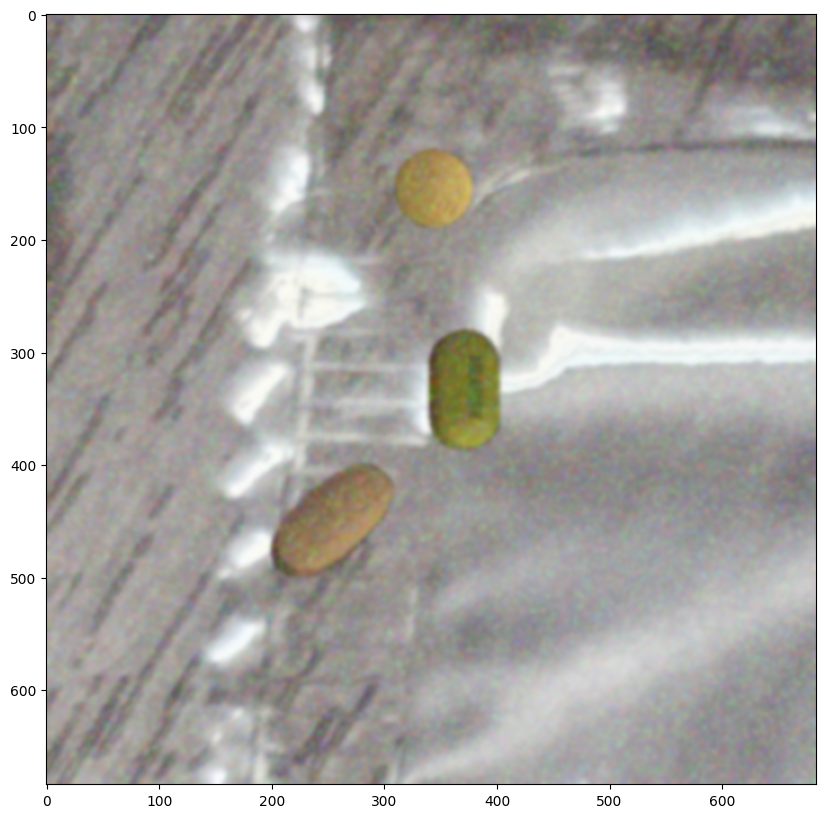

In [ ]:
img, mask, annotations = generator.generate(background_generator.generate(), random.randint(1, 20), regeneration=True, draw=True)
mask = mask[:, :] > 0

if random_choice():
  print("adjust_saturation_rgba")
  img = adjust_saturation_rgba(img, random.uniform(0, 2))
if random_choice():
  print("adjust_exposure_rgba")
  img = adjust_exposure_rgba(img, random.uniform(0.5, 2))
if random_choice():
  print("add_directional_light")
  bright_spot = []
  for _ in range(random.randint(0, 3)):
    x1, y1 = random.randint(0, img.shape[1]), random.randint(0, img.shape[0])
    x2, y2 = random.randint(0, img.shape[1]), random.randint(0, img.shape[0])
    x3, y3 = random.randint(0, img.shape[1]), random.randint(0, img.shape[0])
    x4, y4 = random.randint(0, img.shape[1]), random.randint(0, img.shape[0])
    bright_spot.append(((x1, y1), (x2, y2), (x3, y3), (x4, y4)))
  img = add_directional_light(
    img, bright_spot, ksize=(random.randint(0, 100) * 2 + 1), 
    intensity=random.randint(50, 150), increase_factor=random.uniform(1, 1.5)
  )
# if random_choice():
#   print("random_noise_mask")
#   img[mask] = random_noise(img, mean=0, std=0.3)[mask]
if random_choice():
  print("gaussian_blur_mask")
  img[mask] = gaussian_blur(img, ksize=random.randint(1, 5) * 2 + 1)[mask]
if random_choice():
  print("random_noise")
  img = random_noise(img, mean=0, std=random.uniform(0, 0.8))
if random_choice():
  print("gaussian_blur")
  img = gaussian_blur(img, ksize=random.randint(1, 5) * 2 + 1)
  

# bright_spot = []
# for _ in range(random.randint(0, 3)):
#   x1, y1 = random.randint(0, img.shape[1]), random.randint(0, img.shape[0])
#   x2, y2 = random.randint(0, img.shape[1]), random.randint(0, img.shape[0])
#   x3, y3 = random.randint(0, img.shape[1]), random.randint(0, img.shape[0])
#   x4, y4 = random.randint(0, img.shape[1]), random.randint(0, img.shape[0])
#   bright_spot.append(((x1, y1), (x2, y2), (x3, y3), (x4, y4)))
# img = add_directional_light(
#   img, bright_spot, ksize=(random.randint(0, 100) * 2 + 1), 
#   intensity=random.randint(50, 150), increase_factor=random.uniform(1, 1.5)
# )
# img = adjust_exposure_rgba(img, 0.5)
# img = add_directional_light(img, bright_spot, intensity=75)
# img[mask] = random_noise(img, mean=0, std=0.4)[mask]
# img[mask] = gaussian_blur(img, ksize=5)[mask]
# img = gaussian_blur(img, ksize=3)

# img = adjust_brightness_rgba(img, 10) # 안됨

# img = draw_segementation_at_contours(img, annotations[4])
for ann in zip(*annotations):
  # draw_label_box(img, *ann[3], ann[1])
  pass
show(img)